<a href="https://colab.research.google.com/github/lagarcian/ProyectodeGradoLuisGarcia/blob/main/periodicas_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antes de iniciar la simulación vamos a solucionar la ecuación diferencial $\nabla^2f(x,y)= \frac{\partial ^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} $.

Entonces primero manufacturamos una solución $u$ de tal manera que se cumpla $-\nabla u +au=f(x,y)$ donde $a$ es una constante, definida en $\Omega = (0,1) \times (0,1), u(0,y)=u(1,y), y \in [0,1], u(x,0)=u(x,1), x \in [0,1]$

Discretizando en el eje $(i,j)$

$$ \begin{equation}  
\begin{matrix}
& \cdot_{(i,j+1)} & \\
\cdot_{(i-1,j)} & \cdot_{(i,j)} & \cdot_{(i+1,j)} \\
&\cdot_{(i,j-1)} \end{matrix}
\end{equation} $$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:

k=0.2
a=1/k**2
def u_ma(x, y):
    # return np.cos(x)**3 + np.cos(x) #Primero se escribe la solución manufacturada u_ma
    return np.sin(x)*np.sin(y)
#Debe retornar un número aleatorio. Gaussiano. y esto multiplicarlo por a=1/k^2 y ajustar la ecuación diferencial y que va a ser k^2 np.randn
def f(x, y, a):
     #return 3 * np.cos(x)**3 + np.cos(x) - 6 * np.sin(x)**2 * np.cos(x) + a * u_ma(x, y) #Aqui hallamos las f(x,y,a) para poder escribirla y usarla como solución la ecucación diferencial
    return  (2.0+a)*u_ma(x,y) #np.random.randn()*a

def get_A_b(n, a):
    if n <= 0:
        raise ValueError("n debe ser mayor que 0")

    L = 2.0*np.pi
    h = L / n
    N = n**2
    A = np.zeros((N, N))
    B = np.zeros(N)

    for i in range(n):
        for j in range(n):
            xi = i * h
            yj = j * h
            index_c = i + j*(n) # center
            index_r = i + 1 + j*(n) # right
            index_l = i - 1 + j*(n) # left
            index_b = i + (j-1)*(n) # bottom
            index_t = i + (j+1)*(n) # top

            if i==0:
            # significa que estoy en el borde izquierdo
            # por cond periód, i=0 coincide con i=n
                index_l = n - 1 + j*(n) # left    se modificó

            if i==n-1:
            # significa que estoy a un paso del borde derecho
            # por cond periód, i=n coincide con i=0
                index_r = 0 + j*(n) # right    se modificó

            if j==0:
            # significa que estoy en el borde inferior
            # por cond periód, j=0 coincide con j=n
                index_b = i + (n-1)*(n) # bottom    se modificó

            if j==n-1:
            # significa que estoy a un paso del borde superior
            # por cond periód, j=n coincide con j=0
                index_t = i + (0)*(n) # top      se modificó

            # ahora que conocemos todos los índices apropiados, llenamos la fila
            A[index_c, index_c] = 4 + a * h ** 2
            A[index_c, index_r] = -1
            A[index_c, index_l] = -1
            A[index_c, index_b] = -1
            A[index_c, index_t] = -1

            B[index_c] = h ** 2 * f(xi, yj, a)

    # print(A)

    U = np.linalg.solve(A, B)
    return U

In [ ]:
print(a)

24.999999999999996


[0.     0.     0.     ... 0.0285 0.0191 0.0096]


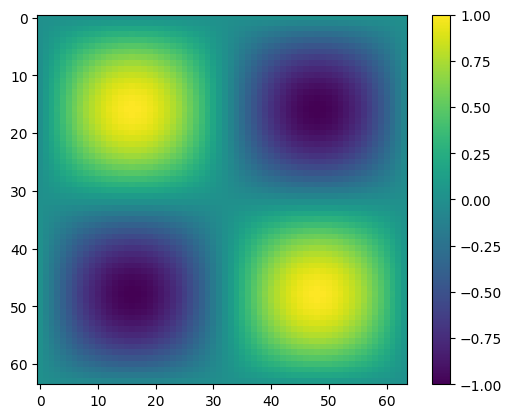

In [ ]:
n = 64
L= 2.0*np.pi
h=L/n

U = get_A_b(n,a)

print(U)

# graficamos la superficie correspondiente a la solución numérica
X, Y = np.meshgrid(np.linspace(0, L-h, n), np.linspace(0, L-h, n))
Z = U.reshape((n , n ))

imagen =plt.imshow(Z, cmap='viridis')
positions = np.linspace(0,len(Z), 10)
labels = np.linspace(0,1,6)
plt.colorbar(imagen);
imagen.autoscale()


[0.     0.     0.     ... 0.0285 0.0191 0.0096]


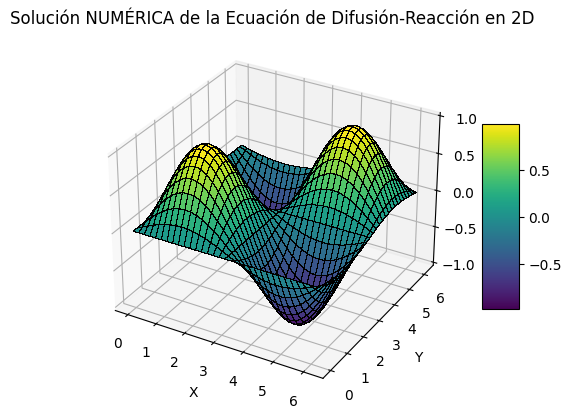

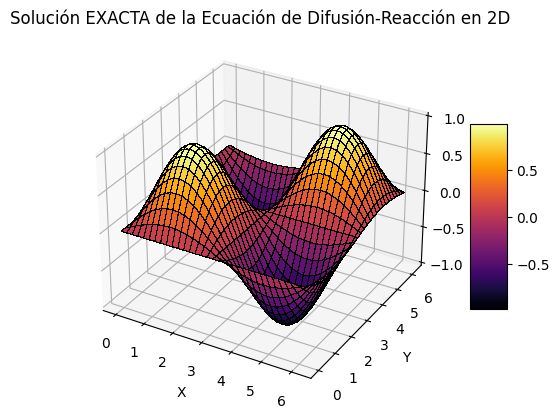

Error en norma max = 5.9480016238344646e-05


In [ ]:

n = 64
L= 2.0*np.pi
h=L/n

U = get_A_b(n,a)

print(U)

# graficamos la superficie correspondiente a la solución numérica
X, Y = np.meshgrid(np.linspace(0, L-h, n), np.linspace(0, L-h, n))
Z = U.reshape((n , n ))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0.01, antialiased=False, edgecolors='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U num')
plt.title('Solución NUMÉRICA de la Ecuación de Difusión-Reacción en 2D')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(np.min(Z), np.max(Z))
plt.show()

# graficamos la superficie correspondiente a la solución exacta (manufacturada)
Z_ma= u_ma(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_ma, cmap='inferno', linewidth=0.01, antialiased=False, edgecolors='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U exa')
plt.title('Solución EXACTA de la Ecuación de Difusión-Reacción en 2D')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(np.min(Z), np.max(Z))
plt.show()

# calculamos una norma del error
print('Error en norma max =',np.max(np.max(Z-Z_ma)))